# Sales Data Analysis

#### Importing Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Reading the Data

In [2]:
data = pd.read_csv('sales_data_sample.csv', encoding=('ISO-8859-1'),index_col=0)
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


#### Basic Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   obj

#### Data Cleaning

##### Removing all the columns not revelant for this analysis

In [4]:
data.drop(['ORDERLINENUMBER','STATUS','PRODUCTCODE','PHONE','STATE',
           'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], axis=1, inplace=True)
data.head(10)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,ADDRESSLINE2,CITY,COUNTRY,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NaN,NYC,USA,Small
10121,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,NaN,Reims,France,Small
10134,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,NaN,Paris,France,Medium
10145,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,NaN,Pasadena,USA,Medium
10159,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,NaN,San Francisco,USA,Medium
10168,36,96.66,3479.76,10/28/2003 0:00,4,10,2003,Motorcycles,95,Technics Stores Inc.,9408 Furth Circle,NaN,Burlingame,USA,Medium
10180,29,86.13,2497.77,11/11/2003 0:00,4,11,2003,Motorcycles,95,Daedalus Designs Imports,"184, chausse de Tournai",NaN,Lille,France,Small
10188,48,100.00,5512.32,11/18/2003 0:00,4,11,2003,Motorcycles,95,Herkku Gifts,"Drammen 121, PR 744 Sentrum",NaN,Bergen,Norway,Medium
10201,22,98.57,2168.54,12/1/2003 0:00,4,12,2003,Motorcycles,95,Mini Wheels Co.,5557 North Pendale Street,NaN,San Francisco,USA,Small


##### Concatenating to 2 address columns with 1 cloumn having null values

In [5]:
data["ADDRESS"] = data["ADDRESSLINE1"].fillna('') + "  " + data["ADDRESSLINE2"].fillna('')
data.drop(['ADDRESSLINE1','ADDRESSLINE2'], axis=1, inplace=True)
data.head(20)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,ADDRESS
ORDERNUMBER,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small,897 Long Airport Avenue
10121,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,Small,59 rue de l'Abbaye
10134,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,Medium,27 rue du Colonel Pierre Avia
10145,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium,78934 Hillside Dr.
10159,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,Medium,7734 Strong St.
10168,36,96.66,3479.76,10/28/2003 0:00,4,10,2003,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,Medium,9408 Furth Circle
10180,29,86.13,2497.77,11/11/2003 0:00,4,11,2003,Motorcycles,95,Daedalus Designs Imports,Lille,France,Small,"184, chausse de Tournai"
10188,48,100.00,5512.32,11/18/2003 0:00,4,11,2003,Motorcycles,95,Herkku Gifts,Bergen,Norway,Medium,"Drammen 121, PR 744 Sentrum"
10201,22,98.57,2168.54,12/1/2003 0:00,4,12,2003,Motorcycles,95,Mini Wheels Co.,San Francisco,USA,Small,5557 North Pendale Street


##### Converting ORDERDATE to pandas Datetime form

In [6]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE']).astype(np.int64)
data.head(20)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,ADDRESS
ORDERNUMBER,,,,,,,,,,,,,,
10107,30,95.70,2871.00,1046044800000000000,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small,897 Long Airport Avenue
10121,34,81.35,2765.90,1052265600000000000,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,Small,59 rue de l'Abbaye
10134,41,94.74,3884.34,1057017600000000000,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,Medium,27 rue du Colonel Pierre Avia
10145,45,83.26,3746.70,1061769600000000000,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium,78934 Hillside Dr.
10159,49,100.00,5205.27,1065744000000000000,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,Medium,7734 Strong St.
10168,36,96.66,3479.76,1067299200000000000,4,10,2003,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,Medium,9408 Furth Circle
10180,29,86.13,2497.77,1068508800000000000,4,11,2003,Motorcycles,95,Daedalus Designs Imports,Lille,France,Small,"184, chausse de Tournai"
10188,48,100.00,5512.32,1069113600000000000,4,11,2003,Motorcycles,95,Herkku Gifts,Bergen,Norway,Medium,"Drammen 121, PR 744 Sentrum"
10201,22,98.57,2168.54,1070236800000000000,4,12,2003,Motorcycles,95,Mini Wheels Co.,San Francisco,USA,Small,5557 North Pendale Street


##### Looking for Missing and Duplicate values.

No record found

In [7]:
nan_df = data[data.isna().any(axis=1)]
nan_df.head(20)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,ADDRESS
ORDERNUMBER,,,,,,,,,,,,,,


In [8]:
data.duplicated( keep='first').sum()

0

##### Describe Data in detail

In [9]:
data.describe()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,3553.889072,1.084235e+18,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,1841.865106,1.992714e+16,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,482.130000,1.041811e+18,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,2203.430000,1.068120e+18,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,3184.800000,1.087258e+18,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,4508.000000,1.100693e+18,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,14082.800000,1.117498e+18,4.000000,12.000000,2005.00000,214.000000


#### Questions

##### Q1: What is monthly sales of each financial year?

In [10]:
monthly_sales = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()

fig = px.line(
    monthly_sales,
    x="MONTH_ID", y="SALES", color="YEAR_ID",
    labels={
        "MONTH_ID": "Months",
        "YEAR_ID": "Years",
        "SALES": "Sales in US Dolloar in Millions"
    },
    title="Monthly Sales Report"
    )
fig.update_layout(
    font_family="Times New Roman",
    font_color="black"
)
fig.show()


##### Q2: What is the best year according to sales?

In [11]:
yearly_sales=data.groupby(['YEAR_ID'])['SALES'].sum().reset_index()

fig = px.bar(
    yearly_sales,
    x="YEAR_ID", y="SALES", text="SALES",
    labels={
        "YEAR_ID": "Years",
        "SALES": "Sales in US Dollar in Millions"
    },
    title="Yearly Sales"
    )
fig.update_layout(
    font_family="Times New Roman",
    font_color="black"
)
fig.show()



##### Q3: Which quarter is the best for each product line?

In [12]:
quarter = data.groupby(['PRODUCTLINE']).QTR_ID.value_counts().reset_index(name='COUNTS').sort_values(by=["PRODUCTLINE", "QTR_ID"])

fig = px.bar(
    quarter,
    x="PRODUCTLINE", y="COUNTS", color="QTR_ID",
    title="Quarterly Sales Data of Products",
    labels={
        "PRODUCTLINE": "Products",
        "COUNTS": "Product Sales Count",
        "QTR_ID": "Quarters"
    }
    )
fig.show()

##### Q4: What product sold the most? Why do you think it sold the most?

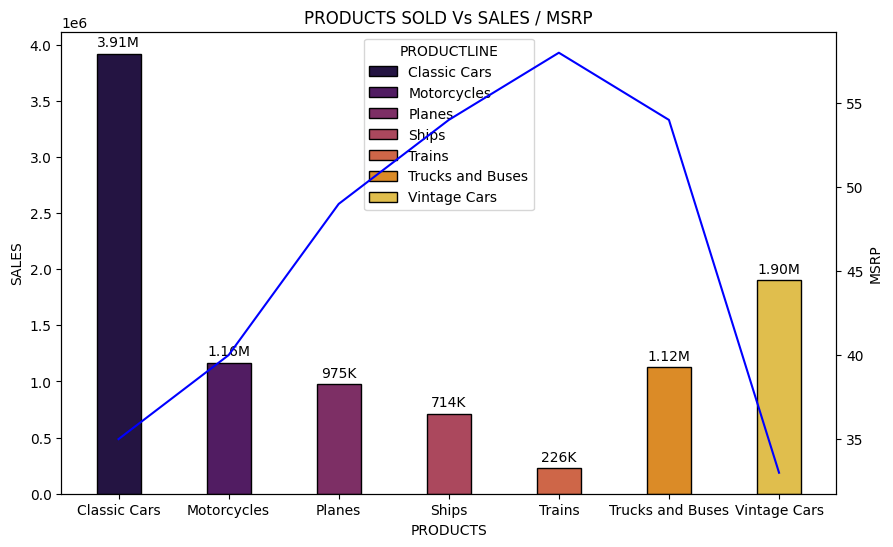

In [13]:
products = data.groupby(['PRODUCTLINE'])['SALES'].sum().reset_index()
price = data.groupby(['PRODUCTLINE'])['MSRP'].min().reset_index()   # MSRP = Manufacturer’s Suggested Retail Price
result=pd.merge(products,price)

plt.figure(figsize=(10,6))

ax = sns.barplot(x='PRODUCTLINE',y='SALES',data=result,hue='PRODUCTLINE',palette='inferno',  # barplot
                 edgecolor='black',dodge=False, width= 0.4)
ax2 = plt.twinx()
sns.lineplot(x='PRODUCTLINE',y='MSRP',data=result,ax=ax2,errorbar=None,color= 'b')  # lineplot

tb = ['3.91M','1.16M','975K','714K','226K','1.12M','1.90M']
ax.bar_label(ax.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
ax.bar_label(ax.containers[1], labels=tb, padding=3)
ax.bar_label(ax.containers[2], labels=tb, padding=3)
ax.bar_label(ax.containers[3], labels=tb, padding=3)
ax.bar_label(ax.containers[4], labels=tb, padding=3)
ax.bar_label(ax.containers[5], labels=tb, padding=3)
ax.bar_label(ax.containers[6], labels=tb, padding=3)

sns.set_style('white')  # background
plt.title("PRODUCTS SOLD Vs SALES / MSRP") # add title
ax.set(xlabel='PRODUCTS')
plt.show()

##### Q5: Who was the top customer?

In [14]:
top_customer = data.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(5)
top_customer = top_customer[['SALES']].round(3)
top_customer.reset_index(inplace = True)

fig = px.bar(
    top_customer,
    x="CUSTOMERNAME", y="SALES", text="SALES",
    labels={
        "CUSTOMERNAME": "Customer",
        "SALES": "Sales in US Dollar in Millions"
    },
    title="TOP 5 Customers"
    )
fig.update_layout(
    font_family="Times New Roman",
    font_color="black"
)
fig.show()

Q6: Which country has the best sales?

In [15]:
country = data.groupby(['COUNTRY'])['SALES'].sum().reset_index()

fig = px.pie(country, values='SALES', names='COUNTRY', title='Sales data based on countries')
fig.show()